In [1]:
import tkinter as tk
from tkinter import filedialog, LabelFrame
from PIL import Image, ImageTk
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [2]:
def convert_to_grayscale(image_path):
    if isinstance(image_path, str):   
        img = Image.open(image_path)
        img_array = np.array(img)
        if len(img_array.shape) == 3:    
            grayscale_image = np.mean(img_array, axis=2).astype(np.uint8)      
        else:        
            grayscale_image = img_array     
    else:
        if len(image_path.shape) == 3:    
            grayscale_image = np.mean(image_path, axis=2).astype(np.uint8)      
        else:        
            grayscale_image = image_path      
    return grayscale_image

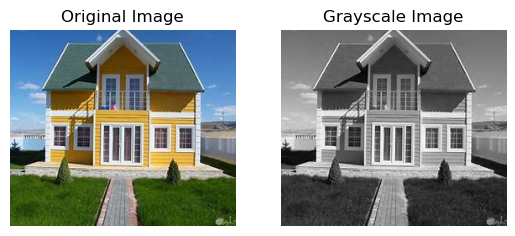

In [3]:
image_path = "C:/Users/ABA/Pictures/Saved Pictures/OIP.jpg"
grayscale_image = convert_to_grayscale(image_path)    
original_image = Image.open(image_path)
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Grayscale Image")
plt.imshow(grayscale_image, cmap='gray')
plt.axis("off")
plt.show()

In [4]:
def calculate_threshold(image_path):
    image=convert_to_grayscale(image_path)
    image_array = np.array(image)
    threshold_value = np.mean(image_array)    
    return threshold_value

In [5]:
image_path = "C:/Users/ABA/Desktop/New folder (3)/1.png"
    
threshold = calculate_threshold(image_path)
    
print(f"Threshold Value: {threshold}")

Threshold Value: 173.1398296082264


In [6]:
def simple_halftoning(image_path, threshold=128):
    grayscale_image = convert_to_grayscale(image_path)
    halftoned_image = np.where(grayscale_image >= threshold, 255, 0)
    return halftoned_image

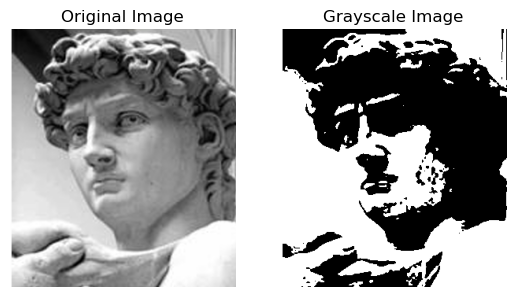

In [7]:
#Example usage
image_path = "C:/Users/ABA/Desktop/New folder (3)/1.png"
threshold = calculate_threshold(image_path)
original_image = Image.open(image_path)
Modified_Image=simple_halftoning(image_path,threshold)
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")
    
plt.subplot(1, 2, 2)
plt.title("Grayscale Image")
plt.imshow(Modified_Image, cmap='gray')
plt.axis("off")
plt.show()


In [8]:
def advanced_halftoning(image_path,threshold=127):
    #calculate_threshold(image_path)
    image=convert_to_grayscale(image_path)
    image_array = np.array(image)
    for x in range(image_array.shape[0]-1):
        for y in range(1,image_array.shape[1]-1):
            old_pixel=image_array[x,y]
            new_pixel= 255 if old_pixel>threshold else 0
            image_array[x,y]=new_pixel
            error=old_pixel- new_pixel
            image_array[x,y+1]+=error*7/16
            image_array[x+1,y+1]+=error*1/16
            image_array[x+1,y]+=error*5/16
            image_array[x+1,y-1]+=error*3/16
    image_array=np.clip(image_array,0,255)
    halftoned_image = Image.fromarray(image_array.astype(np.uint8))
    return halftoned_image

127


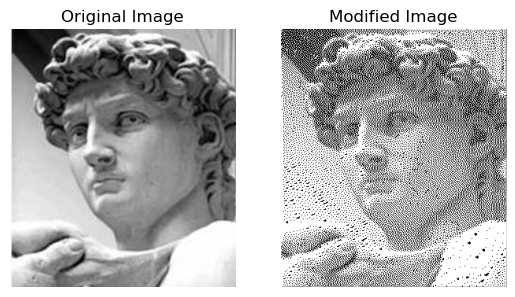

In [9]:
image_path = "C:/Users/ABA/Desktop/New folder (3)/1.png"
original_image = Image.open(image_path)
threshold = calculate_threshold(image_path)
if threshold>127:
    threshold=127
print(threshold)
Modified_Image=advanced_halftoning(image_path,threshold)
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")
    
plt.subplot(1, 2, 2)
plt.title("Modified Image")
plt.imshow(Modified_Image, cmap='gray')
plt.axis("off")
plt.show()


In [10]:
def Histogram(grayscale_image):
    Histogram = np.zeros([256], np.int32)  
    Image_Height, Image_Width = grayscale_image.shape
    for x in range(0, Image_Height):
        for y in range(0, Image_Width):
            Histogram[grayscale_image[x, y]] += 1
    return Histogram

In [11]:
def calculate_cdf(histogram):
    cdf = np.zeros_like(histogram, dtype=np.int32)
    cdf[0] = histogram[0]
    for i in range(1, len(histogram)):
        cdf[i] = cdf[i - 1] + histogram[i]
    return cdf

In [12]:
def histogram_equalization(image_path):
    Max_level = 255
    grayscale_image = convert_to_grayscale(image_path)
    image_array = np.array(grayscale_image, dtype=np.int16)    
    Image_Height, Image_Width = grayscale_image.shape
    Hist = Histogram(image_array)
    Sum_of_Hist = calculate_cdf(Hist)
    Area = Image_Height * Image_Width
    Dm = Max_level  # Maximum grey level for output (255)
    Out_Image = np.zeros_like(grayscale_image)
    for i in range(0, Image_Height):
        for j in range(0, Image_Width):
            k = grayscale_image[i, j]
            Out_Image[i, j] = (Dm / Area) * Sum_of_Hist[k]
    return np.uint8(Out_Image)

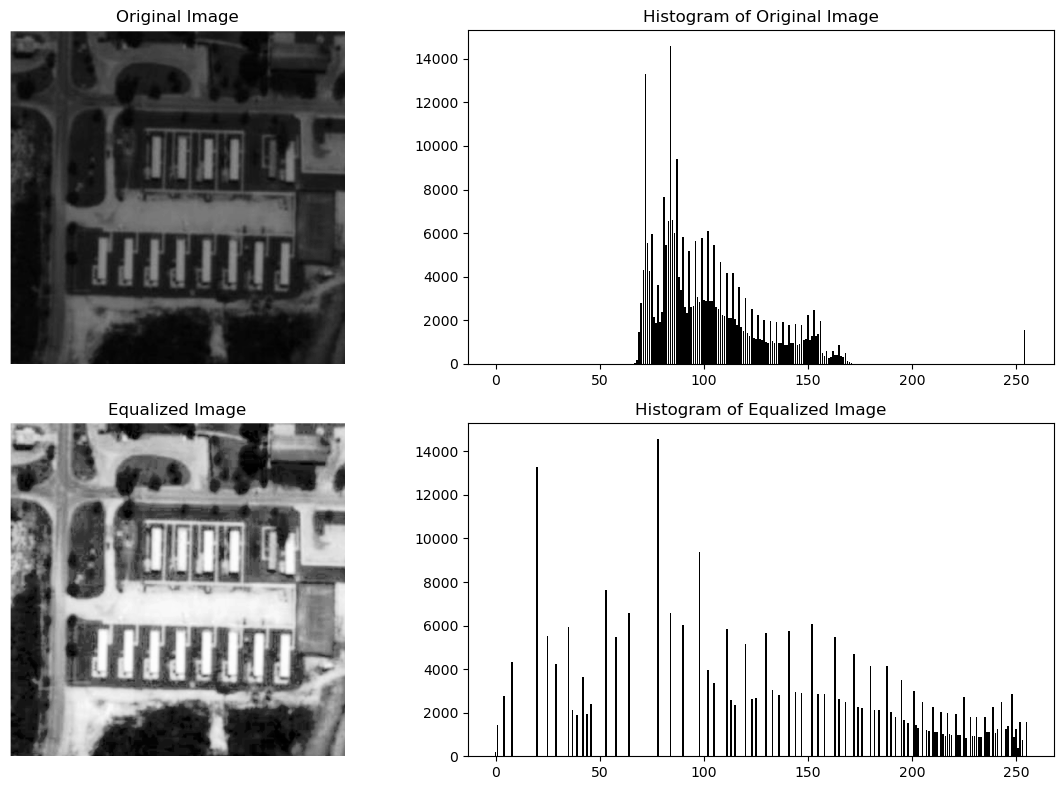

In [13]:
input_image_path = "C:/Users/ABA/Desktop/New folder/3.png"
original_image = convert_to_grayscale(input_image_path)

equalized_image = histogram_equalization(input_image_path)

original_histogram = Histogram(original_image)
equalized_histogram = Histogram(equalized_image)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Histogram of Original Image")
plt.bar(range(256), original_histogram, color='black')

plt.subplot(2, 2, 3)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Histogram of Equalized Image")
plt.bar(range(256), equalized_histogram, color='black')

plt.tight_layout()
plt.show()


In [14]:
def pad_image(image, pad_size=1):
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant', constant_values=0)
    return padded_image
def sobel_edge_detection(image_path):
   
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])
    
    grayscale_image = convert_to_grayscale(image_path)
    image_array = np.array(grayscale_image, dtype=np.int16)

    rows, cols = image_array.shape
    padded_image = pad_image(image_array)


    gradient_x = np.zeros_like(image_array, dtype=np.float64)
    gradient_y = np.zeros_like(image_array, dtype=np.float64)

    for i in range(1, rows-1):
        for j in range(1, cols-1):
            region = padded_image[i-1:i+2, j-1:j+2]
            grad_x = np.sum(region *sobel_x )
            grad_y = np.sum(region * sobel_y)
            gradient_x[i, j] = grad_x
            gradient_y[i, j] = grad_y

    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    magnitude = np.uint8(np.clip(magnitude, 0, 255))

    threshold = calculate_threshold(magnitude)

    final_result = np.zeros_like(magnitude, dtype=np.uint8)
    final_result[magnitude > threshold] = 255
    final_result[magnitude <= threshold] = 0

    return  gradient_x, gradient_y, final_result


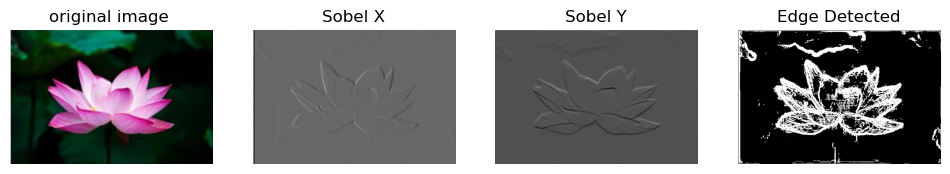

In [15]:
image_path = "C:/Users/ABA/Desktop/New folder (3)/3.png"
original_image = Image.open(image_path)
gradient_x, gradient_y, magnitude = sobel_edge_detection(image_path)
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1), plt.imshow(original_image, cmap='gray'), plt.title('original image ')
plt.axis('off')
plt.subplot(1, 4, 2), plt.imshow(gradient_x, cmap='gray'), plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 4, 3), plt.imshow(gradient_y, cmap='gray'), plt.title('Sobel Y')
plt.axis('off')

plt.subplot(1, 4, 4), plt.imshow(magnitude, cmap='gray'), plt.title('Edge Detected')
plt.axis('off')

plt.show()


In [16]:
def prewitt_edge_detection(image_path):
   
   
    prewitt_x = np.array([[-1, 0, 1],
                           [-1, 0, 1],
                           [-1, 0, 1]])

    prewitt_y = np.array([[-1, -1, -1],
                        [ 0,  0,  0],
                        [ 1,  1,  1]])
    grayscale_image = convert_to_grayscale(image_path)
    image_array = np.array(grayscale_image, dtype=np.int16)

    rows, cols = image_array.shape
    padded_image = pad_image(image_array)

    gradient_x = np.zeros_like(image_array, dtype=np.float64)
    gradient_y = np.zeros_like(image_array, dtype=np.float64)

    for i in range(1, rows-1):
        for j in range(1, cols-1):
            region = padded_image[i-1:i+2, j-1:j+2]
            grad_x = np.sum(region * prewitt_x)
            grad_y = np.sum(region *prewitt_y)
            gradient_x[i, j] = grad_x
            gradient_y[i, j] = grad_y

    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    magnitude = np.uint8(np.clip(magnitude, 0, 255))

    threshold = calculate_threshold(grayscale_image)

    final_result = np.zeros_like(magnitude, dtype=np.uint8)
    final_result[magnitude > threshold] = 255
    final_result[magnitude <= threshold] = 0

    return  gradient_x, gradient_y, final_result


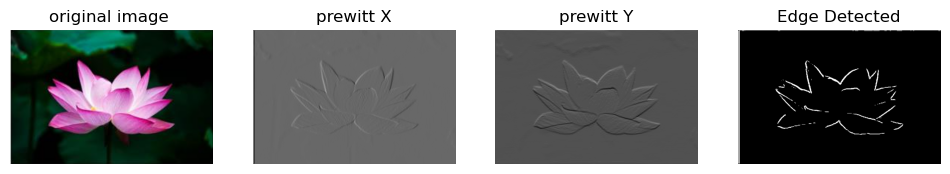

In [17]:
image_path = "C:/Users/ABA/Desktop/New folder (3)/3.png"
gradient_x, gradient_y, magnitude = prewitt_edge_detection(image_path)
original_image = Image.open(image_path)
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1), plt.imshow(original_image, cmap='gray'), plt.title('original image ')
plt.axis('off')
plt.subplot(1, 4, 2), plt.imshow(gradient_x, cmap='gray'), plt.title('prewitt X')
plt.axis('off')

plt.subplot(1, 4, 3), plt.imshow(gradient_y, cmap='gray'), plt.title('prewitt Y')
plt.axis('off')

plt.subplot(1, 4, 4), plt.imshow(magnitude, cmap='gray'), plt.title('Edge Detected')
plt.axis('off')

plt.show()


In [18]:
def KirschCompass_operator(image):
    masks = [
        np.array([[-3, -3,  -3],
                  [-3,  0,  -3],
                  [5, 5,  5]]),  # North

        np.array([[-3, -3,  -3],
                  [5,  0,  -3],
                  [5,  5,  -3]]),  # Northeast

        np.array([[5,  -3, -3],
                  [5,  0, -3],
                  [5, -3, -3]]),  # East

        np.array([[5, 5, -3],
                  [5,  0, -3],
                  [-3, -3,  -3]]),  # Southeast

        np.array([[5,  5,  5],
                  [-3,  0, -3],
                  [-3, -3, -3]]),  # South

        np.array([[-3, 5, 5],
                  [ -3,  0, 5],
                  [ -3,  -3, -3]]),  # Southwest

        np.array([[-3,  -3,  5],
                  [-3,  0,  5],
                  [-3, -3, 5]]),  # West

        np.array([[-3, -3, -3],
                  [-3,  0, 5],
                  [-3, 5, 5]]),  # Northwest
    ]

    image = convert_to_grayscale(image)
    image_array = np.array(image, dtype=np.int16)
    rows, cols = image_array.shape

    padded_image = np.pad(image_array, pad_width=1, mode='constant', constant_values=0)

    responses = []
    magnitude = np.zeros_like(image, dtype=np.float64)

    for mask in masks:
        response = np.zeros_like(image, dtype=np.float64)
        for i in range(1, rows + 1):
            for j in range(1, cols + 1):
                region = padded_image[i - 1:i + 2, j - 1:j + 2]  # Extract the region from padded image
                response[i - 1, j - 1] = np.sum(region * mask)
        responses.append(response) 
        magnitude = np.maximum(magnitude, response)
        #magnitude = np.max(response)


    responses = [np.uint8(np.clip(r, 0, 255)) for r in responses]
    #magnitude = np.uint8(np.clip(magnitude, 0, 255))

    return responses, magnitude




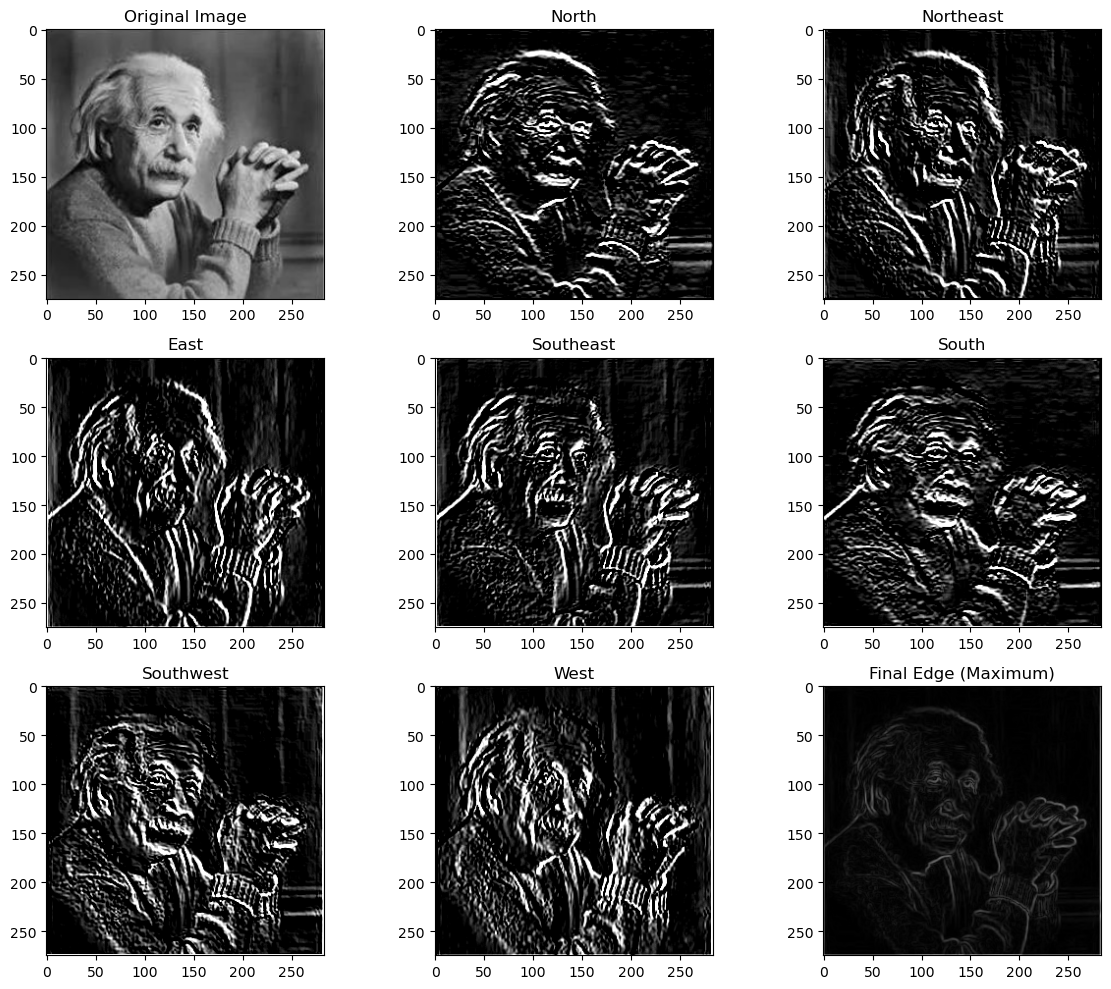

In [19]:
# Load and preprocess the image using Pillow
image_path =  "C:/Users/ABA/Downloads/5.PNG"
image = Image.open(image_path).convert("RGB")

responses, magnitude = KirschCompass_operator(image_path)

# Plot all directional edges and final edge
plt.figure(figsize=(12, 10))

# Plot the original grayscale image
plt.subplot(3, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')

# Plot edges for all 8 directions
directions = ['North', 'Northeast', 'East', 'Southeast', 'South', 'Southwest', 'West', 'Northwest']
for i, response in enumerate(responses):
    plt.subplot(3, 3, i + 2), plt.imshow(response, cmap='gray'), plt.title(f'{directions[i]}')

# Plot the final edge
plt.subplot(3, 3, 9), plt.imshow(magnitude, cmap='gray'), plt.title('Final Edge (Maximum)')

plt.tight_layout()
plt.show()


In [20]:
def homogeneity_operator(image_path, threshold=10):
    grayscale_image = convert_to_grayscale(image_path)
    image_array = np.array(grayscale_image, dtype=np.int16)  

    height, width = image_array.shape
    homogeneity_image = np.zeros_like(image_array, dtype=np.uint8)  

    for x in range(1, height-1):
        for y in range(1, width-1):
            center_pixel = image_array[x, y]
            
            differences = [
                abs(center_pixel - image_array[x-1, y-1]),
                abs(center_pixel - image_array[x-1, y]),
                abs(center_pixel - image_array[x-1, y+1]),
                abs(center_pixel - image_array[x, y-1]),
                abs(center_pixel - image_array[x, y+1]),
                abs(center_pixel - image_array[x+1, y-1]),
                abs(center_pixel - image_array[x+1, y]),
                abs(center_pixel - image_array[x+1, y+1])
            ]
            
            homogeneity_value = max(differences)
            
            if homogeneity_value >= threshold:
                homogeneity_image[x, y] = 255
            else:
                homogeneity_image[x, y] = 0

    return homogeneity_image



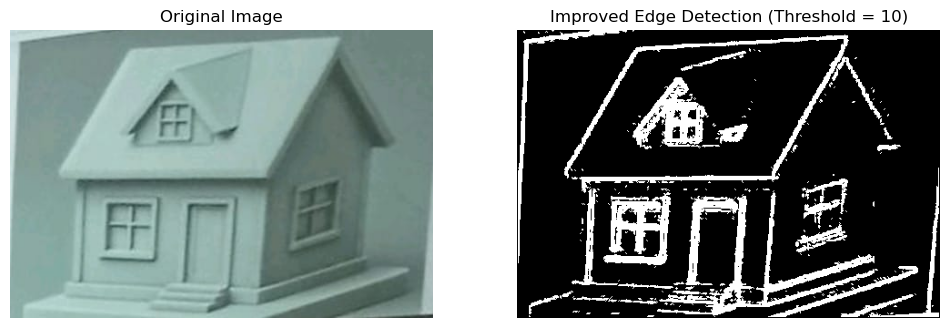

In [21]:
image_path ="C:/Users/ABA/Downloads/WhatsApp Image 2024-11-29 at 2.23.32 PM.jpeg" 
threshold_value = 10  
edge_image = homogeneity_operator(image_path, threshold_value)

image = Image.open(image_path).convert("RGB")
image_array = np.array(image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edge_image, cmap='gray')
plt.title(f'Improved Edge Detection (Threshold = {threshold_value})')
plt.axis('off')

plt.show()


In [22]:
def difference_operator(image_path, threshold=5):
    grayscale_image = convert_to_grayscale(image_path)
    image_array = np.array(grayscale_image, dtype=np.int16)  
    height, width = image_array.shape
    edge_image = np.zeros_like(image_array, dtype=np.uint8)  
    for x in range(1, height - 1):
        for y in range(1, width - 1):
            horizontal_diff = abs(image_array[x, y-1] - image_array[x, y+1])
            vertical_diff = abs(image_array[x-1, y] - image_array[x+1, y])
            diagonal_diff1 = abs(image_array[x-1, y-1] - image_array[x+1, y+1])
            diagonal_diff2 = abs(image_array[x-1, y+1] - image_array[x+1, y-1])
            max_diff = max(horizontal_diff, vertical_diff, diagonal_diff1, diagonal_diff2)            
            if max_diff >= threshold:
                edge_image[x, y] = 255
            else:
                edge_image[x, y] = 0
    return edge_image



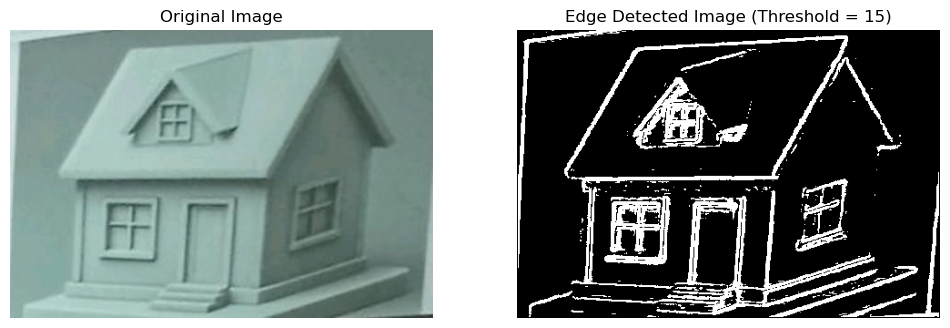

In [23]:
image_path = "C:/Users/ABA/Downloads/WhatsApp Image 2024-11-29 at 2.23.32 PM.jpeg"
threshold_value = 15
edge_detected_image = difference_operator(image_path, threshold_value)

# Display the results
original_image = Image.open(image_path).convert("RGB")
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edge_detected_image, cmap='gray')
plt.title(f'Edge Detected Image (Threshold = {threshold_value})')
plt.axis('off')

plt.show()


In [24]:
def apply_filter(image_array, kernel):
 
    pad = kernel.shape[0] // 2
    padded_image = np.pad(image_array, pad_width=pad, mode='reflect')
    filtered_image = np.zeros_like(image_array)

    for x in range(image_array.shape[0]):
        for y in range(image_array.shape[1]):
            region = padded_image[x:x + kernel.shape[0], y:y + kernel.shape[1]]
            filtered_image[x, y] = np.sum(region * kernel)

    return filtered_image

def difference_of_gaussians(image_path, threshold=200):
    mask_7x7 = np.array([
    [0, 0, -1, -1, -1, 0, 0],
    [0, -2, -3, -3, -3, -2, 0],
    [-1, -3, 5, 5, 5, -3, -1],
    [-1, -3, 5, 16, 5, -3, -1],
    [-1, -3, 5, 5, 5, -3, -1],
    [0, -2, -3, -3, -3, -2, 0],
    [0, 0, -1, -1, -1, 0, 0]])

    mask_9x9 = np.array([
    [0, 0, -1, -1, -1, 0, 0, 0, 0],
    [0, -2, -3, -3, -3, -3, -3, -2, 0],
    [0, -3, -2, -1, -1, -1, -2, -3, 0],
    [-1, -3, -1, 9, 9, 9, -1, -3, -1],
    [9, -1, -3, -1, -1, -3, -1, 9, 9],
    [9, -1, -3, -1, -1, -3, -1, 9, 9],
    [-1, -3, -1, 9, 9, 9, -1, -3, -1],
    [0, -3, -2, -1, -1, -1, -2, -3, 0],
    [0, -2, -3, -3, -3, -3, -3, -2, 0]])

    
    grayscale_image = convert_to_grayscale(image_path)
    image_array = np.array(grayscale_image, dtype=np.float32)
    
    blurred1 = apply_filter(image_array, mask_7x7)
    blurred2 = apply_filter(image_array, mask_9x9)
    
    dog_image = blurred1 - blurred2
    edge_image = np.where(np.abs(dog_image) > threshold, 255, 0).astype(np.uint8)
    
    return edge_image 


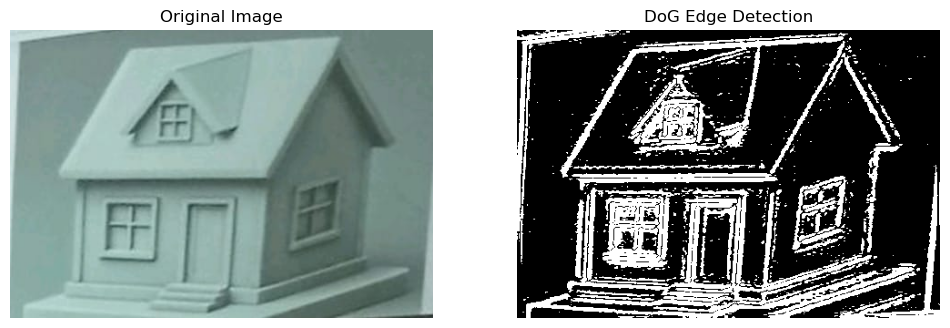

In [25]:
# Example usage
image_path = "C:/Users/ABA/Downloads/WhatsApp Image 2024-11-29 at 2.23.32 PM.jpeg" # Replace with your image path
threshold = calculate_threshold(image_path)
edge_detected_image = difference_of_gaussians(image_path,300)
# Display the results
original_image = Image.open(image_path).convert("RGB")
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edge_detected_image, cmap='gray')
plt.title('DoG Edge Detection')
plt.axis('off')

plt.show()

In [26]:
def contrast_edge_detection(image_path):
    grayscale_image = convert_to_grayscale(image_path)
    image_array = np.array(grayscale_image, dtype=np.float32)
    edge_mask = np.array([[-1, 0, -1],
                          [ 0, 4,  0],
                          [-1, 0, -1]])

    smoothing_mask = np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]]) / 9.0

    edge_detected_image = apply_filter(image_array, edge_mask)

    smoothed_image = apply_filter(image_array, smoothing_mask)

    smoothed_image = np.where(smoothed_image == 0, 1, smoothed_image) 
    normalized_edges = edge_detected_image / smoothed_image
    normalized_edges = np.clip(normalized_edges * 255, 0, 255).astype(np.uint8)

    return  smoothed_image, normalized_edges
    


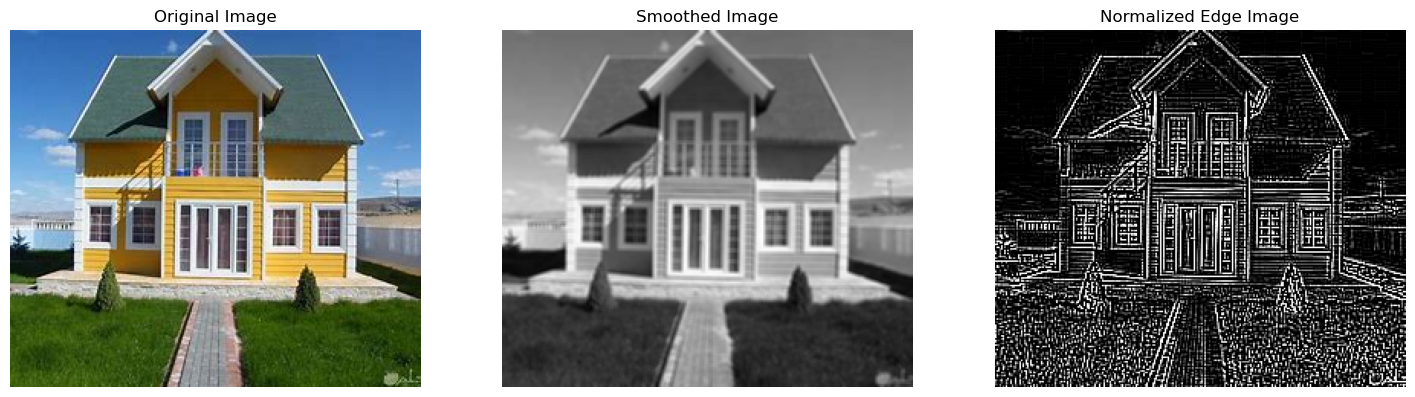

In [27]:
image_path = "C:/Users/ABA/Pictures/Saved Pictures/OIP.jpg"
smoothed_image, normalized_edge_image = contrast_edge_detection(image_path)
original_image = Image.open(image_path).convert("RGB")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(normalized_edge_image, cmap='gray')
plt.title('Normalized Edge Image')
plt.axis('off')

plt.show()

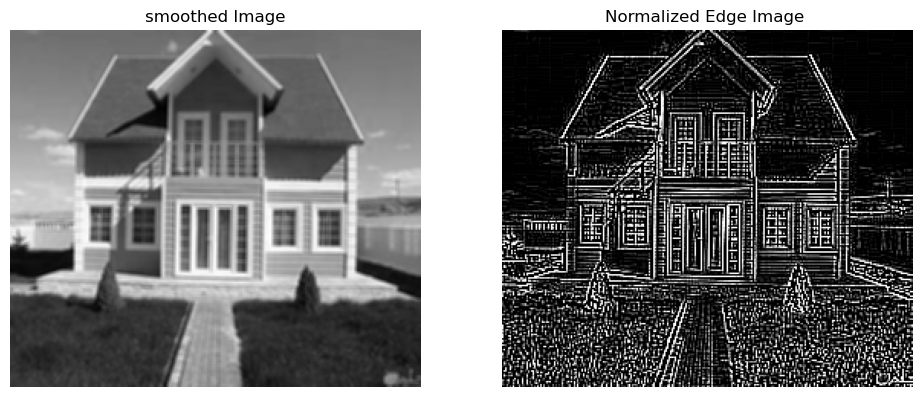

In [28]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(smoothed_image, cmap='gray')
plt.title('smoothed Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(normalized_edge_image, cmap='gray')
plt.title('Normalized Edge Image ')
plt.axis('off')

plt.show()

In [29]:
def variance_edge_detector(image_path, kernel_size=3):
    
    grayscale_image = convert_to_grayscale(image_path)
    image_array = np.array(grayscale_image, dtype=np.float32)
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be odd.")

    pad_size = kernel_size // 2
    padded_image = np.pad(image_array, pad_size, mode='constant', constant_values=0)

    result = np.zeros_like(image_array, dtype=np.float32)

    for i in range(pad_size, padded_image.shape[0] - pad_size):
        for j in range(pad_size, padded_image.shape[1] - pad_size):
            window = padded_image[i-1:i+2, j-1:j+2]

            mean = np.sum(window) / (kernel_size**2)
            
            # Compute the variance manually
            variance = np.sum((window - mean)**2) / (kernel_size**2)
            
            result[i - pad_size, j - pad_size] = variance

    result = np.uint8(np.clip(result, 0, 255))
    return result



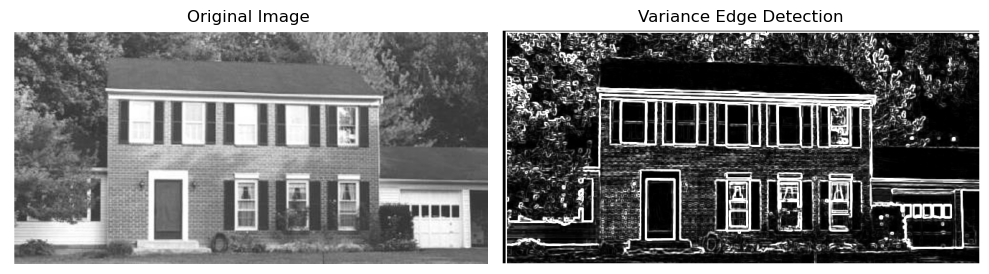

In [30]:
image_path ="C:/Users/ABA/Desktop/New folder (3)/5.png"
#image = cv2.imread(image_path)
original_image = Image.open(image_path).convert("RGB")


edge_image = variance_edge_detector(image_path, kernel_size=3)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Variance Edge Detection")
plt.imshow(edge_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [31]:
def range_edge_detection(image_path, kernel_size=3):
    grayscale_image = convert_to_grayscale(image_path)
    image_array = np.array(grayscale_image, dtype=np.float32)    
    height, width = image_array.shape

    pad_size = kernel_size // 2

    padded_image = np.pad(image_array, pad_size, mode='constant', constant_values=0)

    output_image = np.zeros_like(image_array)

    for i in range(height):
        for j in range(width):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            range_value = neighborhood.max() - neighborhood.min()
            
            output_image[i, j] = range_value

    output_image = np.clip(output_image, 0, 255)

    # Convert to uint8 for valid grayscale image
    return output_image.astype(np.uint8)



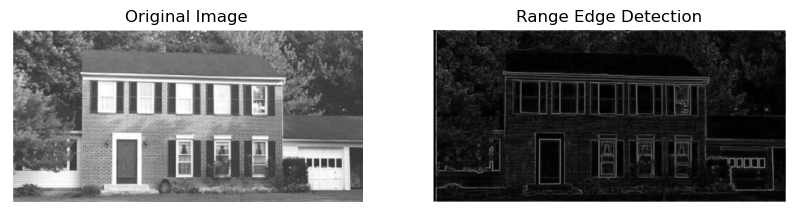

In [32]:
image_path ="C:/Users/ABA/Desktop/New folder (3)/5.png"
original_image = Image.open(image_path).convert("RGB")


edge_detected_image = range_edge_detection(image_path, kernel_size=3)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Range Edge Detection")
plt.imshow(edge_detected_image, cmap='gray')
plt.axis('off')

plt.show()


In [33]:
def median_filter(image_path, filter_size=5):
    grayscale_image = convert_to_grayscale(image_path)
    image_array = np.array(grayscale_image, dtype=np.float32)
    
    height, width = image_array.shape
    pad_size = filter_size // 2
    
    padded_image = np.pad(image_array, pad_size, mode='constant', constant_values=0)
    
    filtered_image = np.zeros_like(image_array)
    
    for i in range(height):
        for j in range(width):
            neighborhood = padded_image[i:i + filter_size, j:j + filter_size]
            median_value = np.median(neighborhood.flatten())
            filtered_image[i, j] = median_value
    
    return filtered_image




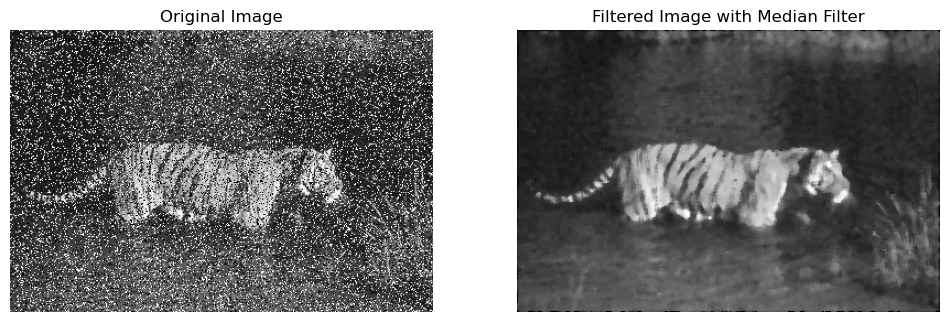

In [34]:
image_path = "C:/Users/ABA/Desktop/New folder/m3.png"

filtered_image = median_filter(image_path, filter_size=5)

original_image = Image.open(image_path).convert("RGB")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image with Median Filter")
plt.axis('off')

plt.show()

In [35]:
def high_pass_filter(image_path):
    grayscale_image = convert_to_grayscale(image_path)
    image_array = np.array(grayscale_image, dtype=np.float32)

    """
    high_pass_mask = np.array([[ 0, -1,  0],
                                [-1,  5, -1],
                                [ 0, -1,  0]])
    """
    
    high_pass_mask = np.array([[ -1, -1,  -1],
                               [-1,  9, -1],
                               [ -1, -1,  -1]])
    """
    
    high_pass_mask = np.array([[ 1, -2,  1],
                               [-2,  5, -2],
                               [ 1, -2,  1]])
    """
    kernel_size = high_pass_mask.shape[0]
    pad = kernel_size // 2

    padded_image = np.pad(image_array, pad_width=pad, mode='reflect')
    filtered_image = np.zeros_like(image_array)

    for x in range(image_array.shape[0]):
        for y in range(image_array.shape[1]):
            region = padded_image[x:x + kernel_size, y:y + kernel_size]
            
            filtered_value = np.sum(region * high_pass_mask)
            filtered_image[x, y] = filtered_value

    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

    return filtered_image



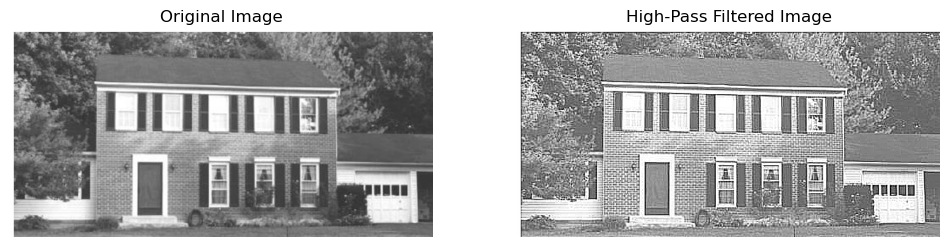

In [36]:
# Example usage
image_path = "C:/Users/ABA/Desktop/New folder/2.png" 
filtered_image = high_pass_filter(image_path)

original_image = Image.open(image_path).convert("RGB")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('High-Pass Filtered Image')
plt.axis('off')

plt.show()


In [37]:
def low_pass_filter(image_path):
    grayscale_image = convert_to_grayscale(image_path)
    image_array = np.array(grayscale_image, dtype=np.float32)

    """
    low_pass_mask = np.array([[0, 1, 0],
                              [1, 2, 1],
                              [0, 1, 0]])* 1/6 
    """
    low_pass_mask = np.array([[1, 1, 1],
                              [1, 1, 1],
                              [1, 1, 1]])* 1/9 

    kernel_size = low_pass_mask.shape[0]
    pad = kernel_size // 2

    padded_image = np.pad(image_array, pad_width=pad, mode='reflect')
    filtered_image = np.zeros_like(image_array)

    for x in range(image_array.shape[0]):
        for y in range(image_array.shape[1]):
            region = padded_image[x:x + kernel_size, y:y + kernel_size]
            
            filtered_value = np.sum(region * low_pass_mask)
            filtered_image[x, y] = filtered_value

    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

    return filtered_image


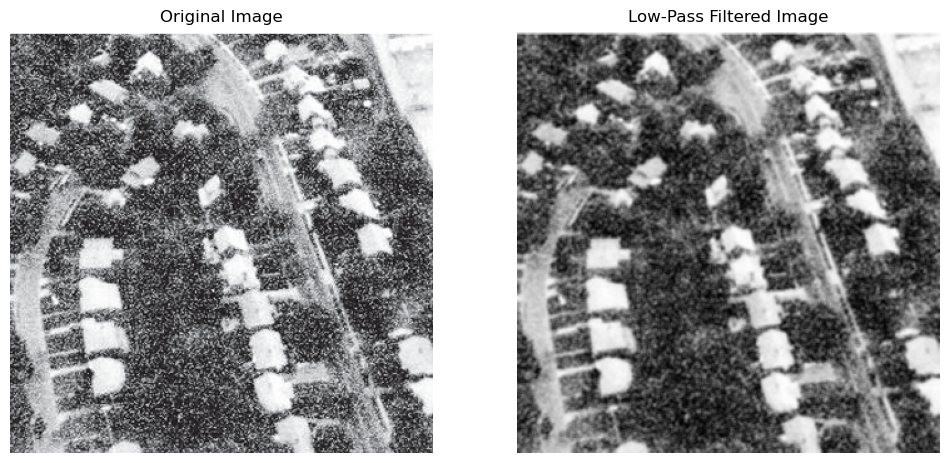

In [38]:
image_path = "C:/Users/ABA/Pictures/Screenshots/Screenshot 2024-11-30 220140.png"  
filtered_image = low_pass_filter(image_path)

original_image = Image.open(image_path).convert("RGB")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Low-Pass Filtered Image')
plt.axis('off')

plt.show()

In [39]:
def add_images(image1_path):
    grayscale_image = convert_to_grayscale(image1_path)
    image_array = np.array(grayscale_image, dtype=np.float32)
    height, width = grayscale_image.shape
   
    image_copy = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            image_copy[i][j] = grayscale_image[i][j]

    added_image = np.zeros((height, width), dtype=np.uint8) 

    for i in range(height):
        for j in range(width):
            added_image[i][j] = grayscale_image[i][j] + image_copy[i][j]
            added_image[i][j] = max(0, min(255, added_image[i][j]))  
                            
    return added_image

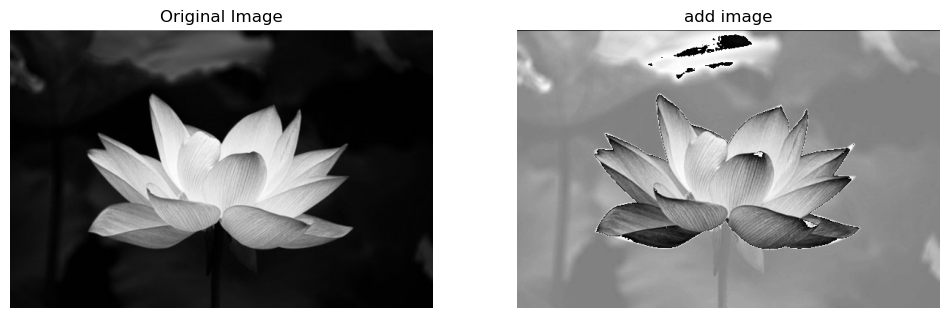

In [40]:
image1_path = "C:/Users/ABA/Pictures/Screenshots/Screenshot 2024-11-30 154134.png"
original_image = Image.open(image1_path).convert("RGB")
result_image = add_images(image1_path)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(result_image, cmap='gray')
plt.title("add image" )
plt.axis('off')

plt.show()

In [41]:
def sub_images(image1_path):
    grayscale_image = convert_to_grayscale(image1_path)
    image_array = np.array(grayscale_image, dtype=np.float32)
    height, width = grayscale_image.shape
   
    #grayscale_image2 = convert_to_grayscale(image2_path)
    image_copy = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            image_copy[i][j] = grayscale_image[i][j]

    sub_image = np.zeros((height, width), dtype=np.uint8) 

    for i in range(height):
        for j in range(width):
            sub_image[i][j] = grayscale_image[i][j] - image_copy[i][j]
            sub_image[i][j] = max(0, min(255, sub_image[i][j]))  
                            
    return sub_image

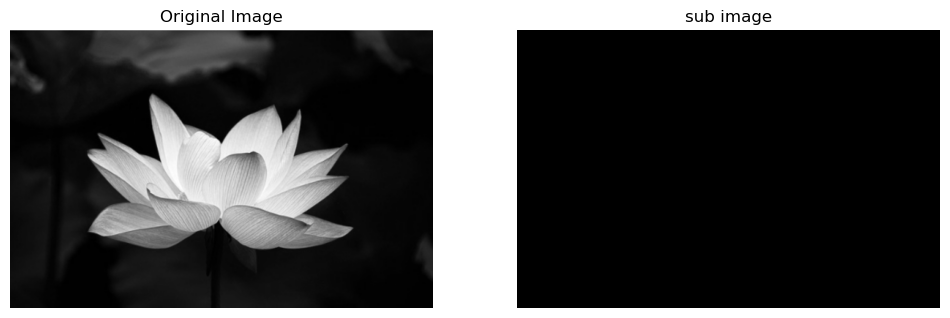

In [42]:
image1_path = "C:/Users/ABA/Pictures/Screenshots/Screenshot 2024-11-30 154134.png"
#image2_path = image1_path  
original_image = Image.open(image1_path).convert("RGB")
result_image = sub_images(image1_path)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(result_image, cmap='gray')
plt.title("sub image" )
plt.axis('off')
plt.show()

In [43]:
def invert_image(image_path):
    grayscale_image = convert_to_grayscale(image_path)   
    return (255 - grayscale_image).astype(np.uint8)

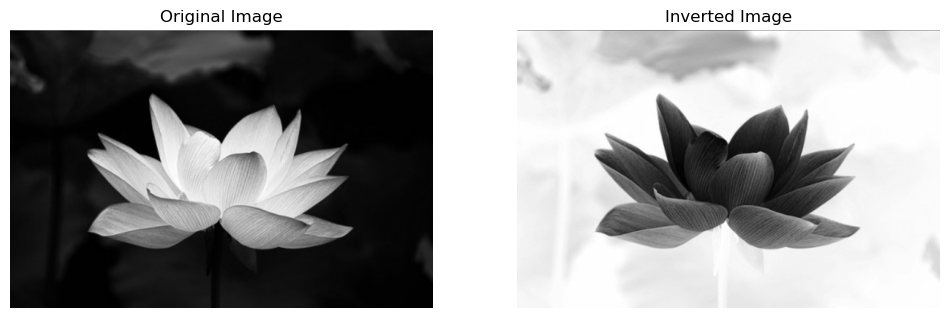

In [44]:
image_path = "C:/Users/ABA/Pictures/Screenshots/Screenshot 2024-11-30 154134.png"
original_image = Image.open(image_path).convert("RGB")
result_image = invert_image(image_path)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(result_image, cmap='gray')
plt.title('Inverted Image')
plt.axis('off')
plt.show()

In [45]:
def manual_histogram_segmentation(image_path, threshold_low, threshold_high):
    grayscale_image = convert_to_grayscale(image_path)
    image_array = np.array(grayscale_image, dtype=np.uint8)
    segmented_image = np.zeros_like(image_array)
    segmented_image[(image_array >= threshold_low) & (image_array <= threshold_high)] = 255 # Object
    return segmented_image

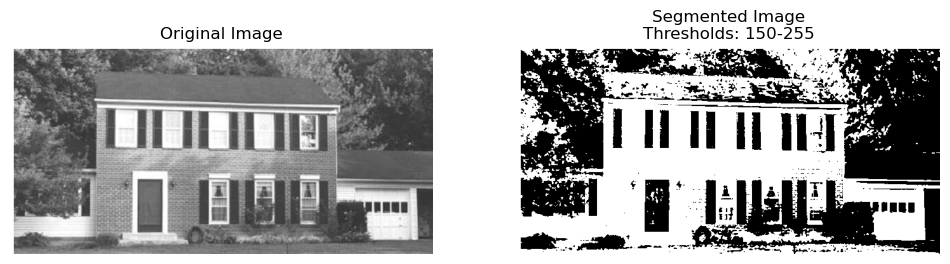

In [46]:
image_path = "C:/Users/ABA/Desktop/New folder (3)/5.png" 
threshold_low = 150  
threshold_high = 255 
segmented_image = manual_histogram_segmentation(image_path, threshold_low, threshold_high)

original_image = Image.open(image_path).convert("RGB")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title(f'Segmented Image\nThresholds: {threshold_low}-{threshold_high}')
plt.axis('off')

plt.show()


In [47]:
def find_peaks(histogram):
   
    peaks = []
    for i in range(1, len(histogram) - 1):
        if histogram[i] > histogram[i - 1] and histogram[i] > histogram[i + 1]:
            peaks.append((i, histogram[i]))
    return peaks

def sort_peaks(peaks):
   
    return sorted(peaks, key=lambda x: x[1], reverse=True)

def apply_threshold(grayscale_image, threshold):
   
    binary_image = (grayscale_image > threshold).astype(np.uint8) * 255
    return binary_image

def histogram_peak_thresholding(image_path):
   # grayscale= convert_to_grayscale(image_path)
    grayscale_image = convert_to_grayscale(image_path)

    
    histogram = Histogram(grayscale_image)
    
    peaks = find_peaks(histogram)
    
    sorted_peaks = sort_peaks(peaks)
    
    if len(sorted_peaks) < 2:
        raise ValueError("Not enough peaks detected in the histogram.")
    
    peak1, peak2 = sorted_peaks[0][0], sorted_peaks[1][0]
    
    threshold = (peak1 + peak2) // 2
    
    seg_image = apply_threshold(grayscale_image, threshold)
    
    return  seg_image, threshold



202


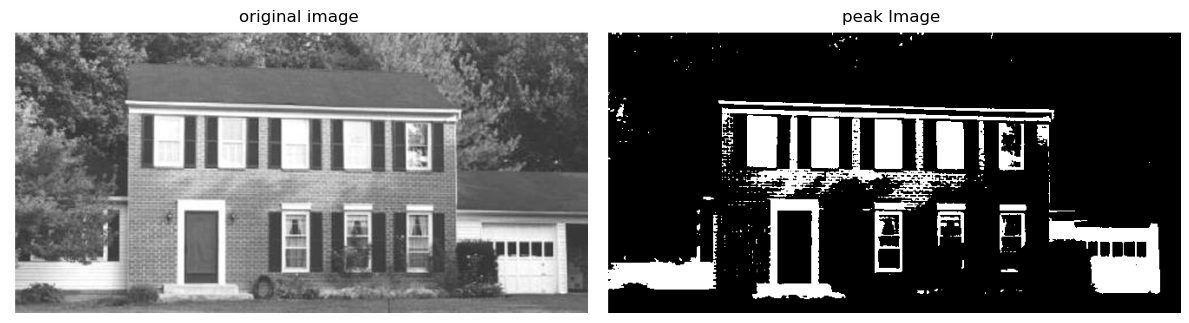

In [48]:
image_path ="C:/Users/ABA/Desktop/New folder (3)/5.png" 
original_image = Image.open(image_path).convert("RGB")

binary, threshold = histogram_peak_thresholding(image_path)
print(threshold)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("original image")
plt.imshow(original_image, cmap="gray")
plt.axis("off")



plt.subplot(1, 2, 2)
plt.title("peak Image")
plt.imshow(binary, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


In [49]:
def find_valley_between_peaks(histogram, peak1, peak2):
    start = min(peak1, peak2)
    end = max(peak1, peak2)
    valley = start
    min_value = histogram[start]
    for i in range(start, end + 1):
        if histogram[i] < min_value:
            min_value = histogram[i]
            valley = i
    return valley
def histogram_valley_thresholding(image_path):
    grayscale_image = convert_to_grayscale(image_path)
    
    histogram = Histogram(grayscale_image)
    
    peaks = find_peaks(histogram)
    
    sorted_peaks = sort_peaks(peaks)
    
    if len(sorted_peaks) < 2:
        raise ValueError("Not enough peaks detected in the histogram.")
    
    peak1, peak2 = sorted_peaks[0][0], sorted_peaks[1][0]
    
    valley = find_valley_between_peaks(histogram, peak1, peak2)
    
    vallay_image = apply_threshold(grayscale_image, threshold)
    
    return vallay_image, threshold


202


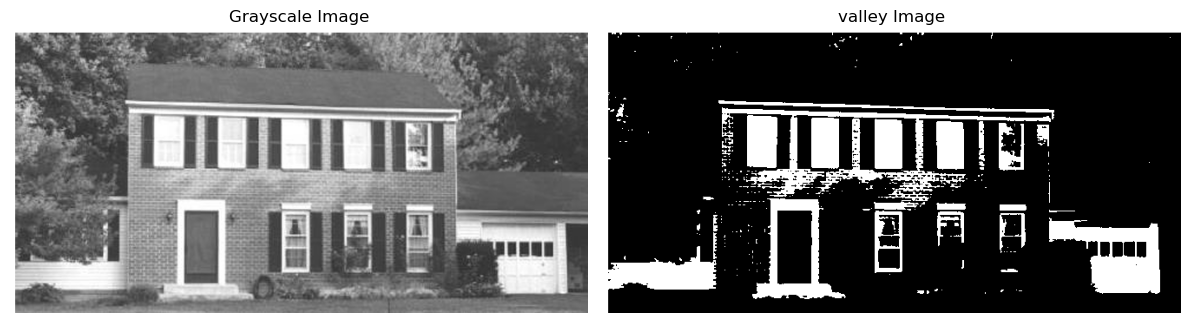

In [50]:
image_path ="C:/Users/ABA/Desktop/New folder (3)/5.png" 
original_image = Image.open(image_path).convert("RGB")
binary, valley = histogram_valley_thresholding(image_path)
print(valley)

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(original_image)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("valley Image")
plt.imshow(binary, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

In [51]:
def detect_peaks(histogram):
    peaks = []
    for i in range(1, len(histogram)-1):
        if histogram[i-1] < histogram[i] > histogram[i+1]:
            peaks.append(i)
    return peaks

def sort_peaks_by_prominence(peaks, histogram):
    return sorted(peaks, key=lambda x: histogram[x], reverse=True)
def segment_image(sub_region, threshold):
    return np.where(sub_region >= threshold, 255, 0).astype(np.uint8)

def adaptive_histogram_segmentation(image):
    region_size = 50

    grayscale_image = convert_to_grayscale(image)
    height, width = grayscale_image.shape
    
    segmented_image = np.zeros_like(grayscale_image)
    
    for i in range(0, height, region_size):
        for j in range(0, width, region_size):
            sub_region = grayscale_image[i:i+region_size, j:j+region_size]
            
            histogram =Histogram(sub_region)
            
            peaks = detect_peaks(histogram)
            
            sorted_peaks = sort_peaks_by_prominence(peaks, histogram)
            
            if len(sorted_peaks) >= 2:
                peak1, peak2 = sorted_peaks[0], sorted_peaks[1]
                valley = find_valley_between_peaks(histogram, peak1, peak2)
                
                segmented_region = segment_image(sub_region, valley)
                
                foreground_pixels = sub_region[segmented_region == 255]
                background_pixels = sub_region[segmented_region == 0]

                foreground_mean = np.mean(foreground_pixels) if foreground_pixels.size > 0 else 0
                background_mean = np.mean(background_pixels) if background_pixels.size > 0 else 0

                adjusted_threshold = (foreground_mean + background_mean) // 2
                final_segmented_region = segment_image(sub_region, adjusted_threshold)
                segmented_image[i:i+region_size, j:j+region_size] = final_segmented_region
    
    return segmented_image


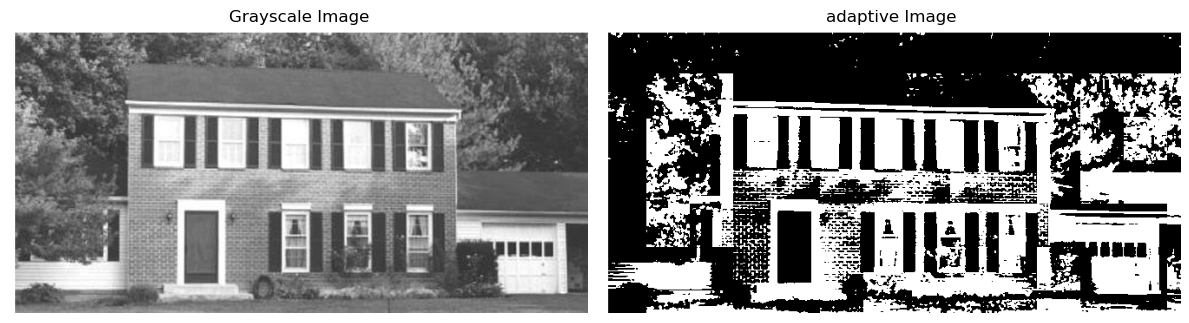

In [52]:
# Test the function
image_path ="C:/Users/ABA/Desktop/New folder (3)/5.png"
original_image = Image.open(image_path).convert("RGB")
binary = adaptive_histogram_segmentation(image_path)
# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(original_image)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("adaptive Image")
plt.imshow(binary, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


In [53]:
def import_image():
    global current_image_path, original_image
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg *.jpeg *.png *.bmp *.gif")])
    if file_path:
        current_image_path = file_path   
        original_image = Image.open(file_path)   
        img_tk = resize_image_to_fit(original_image, original_canvas.winfo_width(), original_canvas.winfo_height())
        original_canvas.config(image=img_tk)
        original_canvas.image = img_tk



In [54]:
def resize_image_to_fit(image, width, height):
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)  
    img_ratio = image.width / image.height
    frame_ratio = width / height
    if img_ratio > frame_ratio:
        new_width = width
        new_height = int(width / img_ratio)
    else:
        new_height = height
        new_width = int(height * img_ratio)

    resized_image = image.resize((new_width, new_height), Image.LANCZOS)
    return ImageTk.PhotoImage(resized_image)


In [55]:
def display_in_tkinter_canvas(image, canvas):
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)  
    resized_image = resize_image_to_fit(image, canvas.winfo_width(), canvas.winfo_height())
    canvas.config(image=resized_image)
    canvas.image = resized_image


In [56]:
def apply_gray_image():
    if current_image_path:
        image=convert_to_grayscale(current_image_path)
        grayscaled_array = Image.fromarray(image.astype(np.uint8))
        display_in_tkinter_canvas(grayscaled_array,modified_canvas)


In [57]:
def apply_histogram_equalization():
    if current_image_path:
        equalized_image = histogram_equalization(current_image_path)
        display_in_tkinter_canvas(equalized_image, modified_canvas)

In [58]:
def display_histogram():
    if current_image_path:
        for widget in modified_canvas.winfo_children():
            widget.destroy()  
        grayscale_image = convert_to_grayscale(current_image_path)
        histogram = Histogram(grayscale_image)  
        fig, ax = plt.subplots()
        ax.bar(range(256), histogram, color='black')
        ax.set_title("Histogram")
        ax.set_xlabel("Pixel Intensity")
        ax.set_ylabel("Frequency")
        canvas = FigureCanvasTkAgg(fig, master=modified_canvas)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)


In [59]:
def display_histogram_equalization():
    if current_image_path:
        for widget in modified_canvas.winfo_children():
            widget.destroy()  
        grayscale_image = convert_to_grayscale(current_image_path)  
        equalized_image = histogram_equalization(grayscale_image)  
        equalized_histogram = Histogram(equalized_image)
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.bar(range(256), equalized_histogram, color='black')
        ax.set_title('Equalized Histogram')
        ax.set_xlabel('Pixel Intensity')
        ax.set_ylabel('Frequency')
        canvas = FigureCanvasTkAgg(fig, master=modified_canvas)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)


In [60]:
def apply_sobel_operator():
    
    if current_image_path:
        x,y,image=sobel_edge_detection(current_image_path)
        display_in_tkinter_canvas(image,modified_canvas)
def apply_prewitt_operator():
    
    if current_image_path:
        x,y,image=prewitt_edge_detection(current_image_path)
        display_in_tkinter_canvas(image,modified_canvas)
def apply_KirschCompass():
    if current_image_path:
        image = Image.open(current_image_path).convert("L")
        image_np = np.array(image)
        x,processed_image = KirschCompass_operator(image_np)
        display_in_tkinter_canvas(processed_image, modified_canvas)

def apply_KirschCompass_operator(direction):
    if current_image_path:
        for widget in modified_canvas.winfo_children():
            widget.destroy() 
        image = Image.open(current_image_path).convert("L")
        image_np = np.array(image)
        responses, _ = KirschCompass_operator(image_np)
        
        direction_names = ['North', 'Northeast', 'East', 'Southeast', 'South', 'Southwest', 'West', 'Northwest']
        
        direction_index = direction_names.index(direction)
        processed_image = responses[direction_index]
        
        display_in_tkinter_canvas(processed_image, modified_canvas)

In [61]:
def apply_contrast_edge_detection():
    if current_image_path:
        image,edge_detection=contrast_edge_detection(current_image_path)
        display_in_tkinter_canvas(edge_detection,modified_canvas)

def apply_variance_edge_detector():
    
    if current_image_path:
        image=variance_edge_detector(current_image_path)
        display_in_tkinter_canvas(image,modified_canvas)

def apply_range_edge_detection():
    
    if current_image_path:
        image=range_edge_detection(current_image_path)
        display_in_tkinter_canvas(image,modified_canvas)

In [62]:
def apply_add_images():
    if current_image_path:
        image=add_images(current_image_path)
        display_in_tkinter_canvas(image,modified_canvas)

def apply_sub_images():
    if current_image_path:
        image=sub_images(current_image_path)
        display_in_tkinter_canvas(image,modified_canvas)
def apply_invert_image():
    if current_image_path:
        image=invert_image(current_image_path)
        display_in_tkinter_canvas(image,modified_canvas)

In [63]:
def apply_median_filter():
    if current_image_path:
        image=median_filter(current_image_path)
        display_in_tkinter_canvas(image,modified_canvas)

def apply_high_pass_filter():
    if current_image_path:
        image=high_pass_filter(current_image_path)
        display_in_tkinter_canvas(image,modified_canvas)

def apply_low_pass_filter():
    if current_image_path:
        image=low_pass_filter(current_image_path)
        display_in_tkinter_canvas(image,modified_canvas)

In [64]:
def apply_histogram_peak_thresholding():
    if current_image_path:
        segmented_image, threshold = histogram_peak_thresholding(current_image_path)
        display_in_tkinter_canvas(segmented_image, modified_canvas)
        tk.messagebox.showinfo("Threshold", f"Calculated Threshold: {threshold}")
def apply_histogram_valley_thresholding():
    if current_image_path:
        valley_image, threshold = histogram_valley_thresholding(current_image_path)
        display_in_tkinter_canvas(valley_image, modified_canvas)
        tk.messagebox.showinfo("Threshold", f"Calculated valley: {threshold}")

def apply_adaptive_histogram_segmentation():
    if current_image_path:
        segmented_image = adaptive_histogram_segmentation(current_image_path)
        display_in_tkinter_canvas(segmented_image, modified_canvas)



In [65]:
def exit_program():
    root.destroy()

root = tk.Tk()
root.title("Image Processing Tool")
root.geometry("1200x750")
root.configure(bg="#f5deb3")
root.maxsize(1200,800)

basic_frame = LabelFrame(root, text="Basic Options", bg="#f5deb3", font=("Arial", 12, "bold"))
basic_frame.place(x=10, y=20, width=200, height=450)
advanced_frame = LabelFrame(root, text="Advanced Options", bg="#f5deb3", font=("Arial", 12, "bold"))
advanced_frame.place(x=50, y=520, width=1100, height=220)


image_frame = LabelFrame(root, text="Show", bg="#d2b48c", font=("Arial", 12, "bold"))
image_frame.place(x=230, y=20, width=950, height=500)

tk.Label(image_frame, text="Original Image", bg="#d2b48c", font=("Arial", 10)).place(x=50, y=10)
tk.Label(image_frame, text="Modified Image", bg="#d2b48c", font=("Arial", 10)).place(x=400, y=10)

original_canvas = tk.Label(image_frame, bg="white", width=80, height=10)
original_canvas.place(x=0, y=50, width=400, height=400)

modified_canvas = tk.Label(image_frame, bg="white", width=30, height=10)
modified_canvas.place(x=500, y=50, width=400, height=400)

In [66]:
tk.Button(basic_frame, text="Import Image", width=20, bg="#d2b48c", font=("Arial", 10), command=import_image).grid(row=0, column=0, pady=10)
tk.Button(basic_frame, text="Exit", width=20, bg="#d2b48c", font=("Arial", 10), command=exit_program).grid(row=7, column=0, pady=10)
tk.Button(basic_frame, text="gray image", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_gray_image).grid(row=1, column=0, pady=10)
tk.Button(basic_frame,text="median filter", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_median_filter).grid(row=2, column=0, padx=10,pady=10)
tk.Button(basic_frame, text="high pass filter", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_high_pass_filter).grid(row=3, column=0, padx=10,pady=10)
tk.Button(basic_frame, text="low pass filter", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_low_pass_filter).grid(row=4, column=0, padx=10,pady=10)
tk.Button(basic_frame, text="invert image", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_invert_image).grid(row=5, column=0, padx=10,pady=10)

direction_var = tk.StringVar(root)
direction_var.set('North')  

def on_direction_change(*args):
    apply_KirschCompass_operator(direction_var.get())

direction_menu = tk.OptionMenu(basic_frame, direction_var, 'North', 'Northeast', 'East', 'Southeast', 'South', 'Southwest', 'West', 'Northwest', command=on_direction_change)
direction_menu.config(font=("Arial", 10),bg="#d2b48c",width=18)
direction_menu.grid(row=6, column=0, padx=10,pady=10)

In [67]:
tk.Button(advanced_frame, text="display histogram", width=20, bg="#d2b48c", font=("Arial", 10), command=display_histogram).grid(row=0, column=1, pady=10)
tk.Button(advanced_frame, text="display histogram eq", width=20, bg="#d2b48c", font=("Arial", 10), command=display_histogram_equalization).grid(row=1, column=1, padx=10)
tk.Button(advanced_frame, text="histogram equalization", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_histogram_equalization).grid(row=2, column=1, padx=10)
tk.Button(advanced_frame, text="contrast edge detection", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_contrast_edge_detection).grid(row=3, column=3, padx=10,pady=10)
tk.Button(advanced_frame, text="add images", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_add_images).grid(row=2, column=0, padx=10,pady=10)
tk.Button(advanced_frame, text="sub images", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_sub_images).grid(row=3, column=0, padx=10,pady=10)
tk.Button(advanced_frame, text="sobel operator ", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_sobel_operator).grid(row=0, column=2, padx=10,pady=10)
tk.Button(advanced_frame, text="prewitt operator ", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_prewitt_operator).grid(row=1, column=2, padx=10,pady=10)
tk.Button(advanced_frame, text="variance edge etector ", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_variance_edge_detector).grid(row=3, column=2, padx=10,pady=10)
tk.Button(advanced_frame, text="range edge etector ", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_range_edge_detection).grid(row=3, column=1, padx=10,pady=10)
tk.Button(advanced_frame, text="histogram peak Technique", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_histogram_peak_thresholding).grid(row=1, column=4, padx=10,pady=10)
tk.Button(advanced_frame, text="histogram valley Technique", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_histogram_valley_thresholding).grid(row=2, column=4, padx=10,pady=10)
tk.Button(advanced_frame, text="KirschCompass operator ", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_KirschCompass).grid(row=2, column=2, padx=10,pady=10)
tk.Button(advanced_frame, text="adaptive histogram ", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_adaptive_histogram_segmentation).grid(row=3, column=4, padx=10,pady=10)

In [68]:
def apply_simple_halftoning():
    if current_image_path:
        threshold = int(threshold_var.get())  
        image = simple_halftoning(current_image_path, threshold)
        display_in_tkinter_canvas(image, modified_canvas)

def open_threshold_popup():
    # إنشاء نافذة منبثقة لإدخال قيمة threshold
    popup = tk.Toplevel(root)
    popup.title("Enter Threshold for Simple Halftoning")
    popup.geometry("300x150")
    popup.configure(bg="#f5deb3")

    threshold_var.set('0')    

    tk.Label(popup, text="Enter Threshold Value:", bg="#f5deb3", font=("Arial", 10)).pack(pady=10)
    threshold_entry = tk.Entry(popup, textvariable=threshold_var, font=("Arial", 10))
    threshold_entry.pack(pady=5)

    def submit_threshold():
        popup.destroy()  
        apply_simple_halftoning()  

    tk.Button(popup, text="Apply", bg="#d2b48c", font=("Arial", 10), command=submit_threshold).pack(pady=20)

threshold_var = tk.StringVar()

tk.Button(advanced_frame, text="simple Halftoning", width=20, bg="#d2b48c", font=("Arial", 10), command=open_threshold_popup).grid(row=0, column=0, padx=10)
def apply_advanced_halftoning():
    if current_image_path:
        try:
            threshold = int(threshold_var.get())   
            image = advanced_halftoning(current_image_path, threshold)
            display_in_tkinter_canvas(image, modified_canvas)
        except ValueError:
            tk.messagebox.showerror("Invalid Input", "Please enter a valid integer value for threshold.")

def open_threshold_popup():
    global threshold_var
    popup = tk.Toplevel(root)
    popup.title("Enter Threshold")
    popup.geometry("300x150")
    popup.configure(bg="#f5deb3")

    threshold_var = tk.StringVar(value="0")  

    tk.Label(popup, text="Threshold Value:", bg="#f5deb3", font=("Arial", 10)).pack(pady=10)
    threshold_entry = tk.Entry(popup, textvariable=threshold_var, font=("Arial", 10))
    threshold_entry.pack(pady=5)

    def submit_threshold():
        popup.destroy()
        apply_advanced_halftoning()  

    tk.Button(popup, text="Apply", bg="#d2b48c", font=("Arial", 10), command=submit_threshold).pack(pady=20)

tk.Button(advanced_frame, text="advanced Halftoning", width=20, bg="#d2b48c", font=("Arial", 10), command=open_threshold_popup).grid(row=1, column=0, padx=10)


In [69]:
def apply_homogeneity_operator():
    if current_image_path:
        try:
            threshold_input = threshold_var.get().strip()     

            if threshold_input.isdigit():
                threshold = int(threshold_input)  
                image = homogeneity_operator(current_image_path, threshold)
                display_in_tkinter_canvas(image, modified_canvas)
            else:
                raise ValueError("The input is not a valid integer.")  
        except ValueError as e:
            print(f"Error: {e}")
            messagebox.showerror("Invalid input", "Please enter a valid number for threshold.")

def apply_homogeneity_operator_popup():
    popup = tk.Toplevel(root)
    popup.title("Enter Threshold for Homogeneity Operator")
    popup.geometry("300x150")
    popup.configure(bg="#f5deb3")

    threshold_var.set("8")  

    tk.Label(popup, text="Threshold Value:", bg="#f5deb3", font=("Arial", 10)).pack(pady=10)
    threshold_entry = tk.Entry(popup, textvariable=threshold_var, font=("Arial", 10))
    threshold_entry.pack(pady=5)

    def submit_threshold():
        try:
            threshold_input = threshold_var.get().strip()  

            if threshold_input.isdigit() and threshold_input != "":
                threshold = int(threshold_input)   
                popup.destroy()
                apply_homogeneity_operator()  
            else:
                raise ValueError("The input is not a valid integer.")     
        except ValueError as e:
            print(f"Error: {e}")
            messagebox.showerror("Invalid input", "Please enter a valid number for threshold.")    

    tk.Button(popup, text="Apply", bg="#d2b48c", font=("Arial", 10), command=submit_threshold).pack(pady=20)

tk.Button(advanced_frame, text="homogeneity operator", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_homogeneity_operator_popup).grid(row=0, column=3, padx=10, pady=10)
def apply_difference_operator_with_input():
    if current_image_path:
        popup = tk.Toplevel(root)
        popup.title("Enter Threshold")
        popup.geometry("300x150")
        popup.configure(bg="#f5deb3")

        threshold_var = tk.IntVar(value=0)

        tk.Label(popup, text="Threshold Value:", bg="#f5deb3", font=("Arial", 10)).pack(pady=10)
        threshold_entry = tk.Entry(popup, textvariable=threshold_var, font=("Arial", 10))
        threshold_entry.pack(pady=5)

        def submit_threshold():
            try:
                threshold = threshold_var.get()  
                popup.destroy()  

                image = difference_operator(current_image_path, threshold)
                display_in_tkinter_canvas(image, modified_canvas)

            except ValueError:
                tk.messagebox.showerror("Error", "Please enter a valid integer.")

        tk.Button(popup, text="Apply", bg="#d2b48c", font=("Arial", 10), command=submit_threshold).pack(pady=20)

tk.Button(advanced_frame,text="difference operator",width=20,bg="#d2b48c",font=("Arial", 10),command=apply_difference_operator_with_input).grid(row=1, column=3, padx=10, pady=10)
def apply_difference_of_gaussians_popup():
    if current_image_path:
        popup = tk.Toplevel(root)
        popup.title("Set Threshold")
        popup.geometry("300x200")
        popup.configure(bg="#f5deb3")

        threshold_var = tk.StringVar()

        tk.Label(popup, text="Enter Threshold Value:", bg="#f5deb3", font=("Arial", 10)).pack(pady=10)
        threshold_entry = tk.Entry(popup, textvariable=threshold_var, font=("Arial", 10))
        threshold_entry.pack(pady=5)

        def submit_threshold():
            threshold_value = threshold_var.get().strip()

            if not threshold_value.isdigit():
                tk.messagebox.showerror("Input Error", "Please enter a valid positive integer.")
                return

            try:
                threshold = int(threshold_value)

                try:
                    image = difference_of_gaussians(current_image_path,threshold)
                    display_in_tkinter_canvas(image, modified_canvas)
                except Exception as e:
                    tk.messagebox.showerror("Processing Error", f"Error in difference_of_gaussians: {e}")
                    print(f"Error details: {e}")

                popup.destroy()

            except ValueError as ve:
                tk.messagebox.showerror("Conversion Error", f"Value conversion failed: {ve}")
            except Exception as e:
                tk.messagebox.showerror("Unexpected Error", f"An unexpected error occurred: {e}")

        tk.Button(popup, text="Apply", bg="#d2b48c", font=("Arial", 10), command=submit_threshold).pack(pady=20)

tk.Button(advanced_frame, text="difference of gaussians", width=20, bg="#d2b48c", font=("Arial", 10), command=apply_difference_of_gaussians_popup
).grid(row=2, column=3, padx=10, pady=10)

In [70]:
def apply_manual_histogram_segmentation():
    if current_image_path:
        popup = tk.Toplevel(root)
        popup.title("Manual Segmentation Thresholds")
        popup.geometry("300x200")
        popup.configure(bg="#f5deb3")

        threshold_low_var = tk.IntVar(value=0)
        threshold_high_var = tk.IntVar(value=0)

        tk.Label(popup, text="Threshold Low:", bg="#f5deb3", font=("Arial", 10)).pack(pady=10)
        threshold_low_entry = tk.Entry(popup, textvariable=threshold_low_var, font=("Arial", 10))
        threshold_low_entry.pack(pady=5)

        tk.Label(popup, text="Threshold High:", bg="#f5deb3", font=("Arial", 10)).pack(pady=10)
        threshold_high_entry = tk.Entry(popup, textvariable=threshold_high_var, font=("Arial", 10))
        threshold_high_entry.pack(pady=5)

        def submit_thresholds():
            threshold_low = threshold_low_var.get()
            threshold_high = threshold_high_var.get()
            popup.destroy()  
            
            image = manual_histogram_segmentation(current_image_path, threshold_low, threshold_high)
            display_in_tkinter_canvas(image, modified_canvas)

        tk.Button(popup, text="Apply", bg="#d2b48c", font=("Arial", 10), command=submit_thresholds).pack(pady=20)

tk.Button(advanced_frame,text="manual segmentation",width=20,bg="#d2b48c",font=("Arial", 10),command=apply_manual_histogram_segmentation).grid(row=0, column=4, padx=10, pady=10)

root.mainloop()
